In [1]:
# First import Tensorflow
# and keras --> consider as API  which can be intergrated  verious other languages


Tensorflow is a library in python. it is very low level library it can help us provide all  the intergration to make the nural networks it can provide us all kind of classes. for examples sequential class


TensorFlow is a powerful library for machine learning and deep learning, developed by Google. It helps process large amounts of data and train AI models efficiently using mathematical operations on tensors (multi-dimensional arrays).

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

## **Getting Data**

In [2]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df= sns.load_dataset('mpg')
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In this dataset we have to predict the value of mpg(miles per gallon)

mpg = target varible
cylinders= no. of cylinders in cars
displacement = engine displacement of car
horsepower = engine power of particular car
weight = weight of car
accelaration = time taken by get into speed
model_year = year
origin =  country of origin
name= model name of car


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Data **Preparation**

In [7]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [8]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

<ipython-input-8-5d8138586162>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)


In [9]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [10]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [11]:
df = df.drop('name',axis=1)

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

## **Check Outliers**

In [13]:
print(df['horsepower'].skew())
print(df['displacement'].skew())
print(df['weight'].skew())
print(df['acceleration'].skew())

1.0955524807071189
0.7196451643005952
0.5310625125994629
0.27877684462588986


# skew()= if the value is betwwen 1 and -1  ----> We don't have any outliers.

In [14]:
import numpy as np
df['horsepower'] =np.where(df['horsepower']>200, 200, df['horsepower'])

<Axes: ylabel='horsepower'>

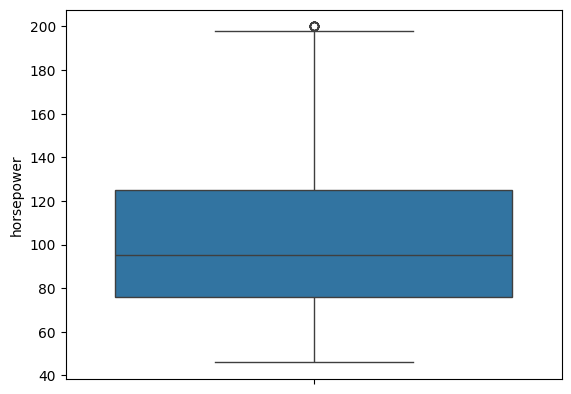

In [15]:
sns.boxplot(df['horsepower'])

## Dummy Encoding


In [16]:
import pandas as pd
df = pd.get_dummies(df, columns=['origin'],drop_first=True,prefix='origin',dtype=int)

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


mpg is liner dataset.

cylinders and model_year, through have datatype of int. but they define the car category, so we need to perfrom one-hot encoding

eg= 1970 catergory model , 2024 category model.

In [21]:
df = pd.get_dummies(df, columns=['cylinders'],drop_first=True,prefix='cylinders',dtype=int)
df = pd.get_dummies(df, columns=['model_year'],drop_first=True,prefix='model_year',dtype=int)

In [22]:
df.columns


Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin_japan', 'origin_usa', 'cylinders_4', 'cylinders_5',
       'cylinders_6', 'cylinders_8', 'model_year_71', 'model_year_72',
       'model_year_73', 'model_year_74', 'model_year_75', 'model_year_76',
       'model_year_77', 'model_year_78', 'model_year_79', 'model_year_80',
       'model_year_81', 'model_year_82'],
      dtype='object')

In [23]:
target =['mpg']
predictors = list(set(list(df.columns))-set(target))

In [24]:
predictors

['horsepower',
 'displacement',
 'acceleration',
 'cylinders_6',
 'weight',
 'cylinders_8',
 'model_year_77',
 'cylinders_5',
 'model_year_80',
 'model_year_82',
 'model_year_78',
 'origin_usa',
 'model_year_76',
 'model_year_71',
 'cylinders_4',
 'model_year_74',
 'model_year_79',
 'model_year_72',
 'model_year_73',
 'model_year_81',
 'model_year_75',
 'origin_japan']

In [26]:
X = df[predictors].values
y = df[target].values

In [31]:
type(X)

numpy.ndarray

## **Divide into Train and test Datasets**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [35]:
X_train.shape[1]

22

## **Build Neural Network**

input shape define the number  of features every node will receive
and input shape takes a tuple as a input

In [41]:
model = Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1], ), activation='relu'))# Input layer
model.add(tf.keras.layers.Dense(1))  # output layer

In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)